In [1]:
from skimage import io, color, transform, feature, exposure
from sklearn import preprocessing, decomposition, datasets, svm, metrics
from matplotlib import pyplot as plt

## Preprocessing
- Grayscale
- Resize
- Extract History of Oriented Gradient (HOG)
- Standar Scale
- Principle Component Analysis (PCA)

### Convert an image into HOG

In [2]:
path = '/Users/mt/data/Landmark_Classification/train/bao_tang_ha_noi/604b38902328ac2a.jpg'
img = io.imread(path)
n_chan = img.shape[2]

if n_chan == 4: #rgba
    img = color.rgba2rgb(img)

grayscale = color.rgb2gray(img)
grayscale = transform.resize(grayscale, (128, 128))

_, vis_hog = feature.hog(grayscale, visualize=True)

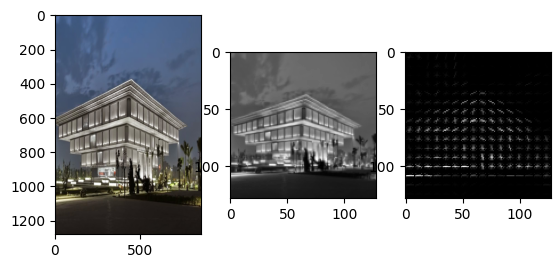

In [3]:
_, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(img)
axes[1].imshow(grayscale, cmap=plt.cm.gray)
axes[2].imshow(vis_hog, cmap=plt.cm.gray)

### Helper function to convert image to HOG feature vector

In [4]:
def img_to_hog(img_path):
    img = io.imread(path)
    n_chan = img.shape[2]

    if n_chan == 4: #rgba
        img = color.rgba2rgb(img)

    grayscale = color.rgb2gray(img)
    grayscale = transform.resize(grayscale, (128, 128))

    hog = feature.hog(grayscale)

    return hog

### Preprocess train dataset

In [5]:
ds_train = datasets.load_files('/Users/mt/data/Landmark_Classification/train/', load_content=False)

# extract HOG
X = []
for path in ds_train.filenames:
    hog = img_to_hog(path)
    X.append(hog)

# standard scale
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA
# pca = decomposition.PCA(n_components=32*32)
# pca.fit(X_scaled)
# X_pca = pca.transform(X_scaled)

# X_train = X_pca
X_train = X_scaled
y_train = ds_train.target

### Preprocess test dataset

In [6]:
ds_test = datasets.load_files('/Users/mt/data/Landmark_Classification/test/', load_content=False)

# extract HOG
X = []
for path in ds_test.filenames:
    hog = img_to_hog(path)
    X.append(hog)

# standard scale
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# PCA
# pca = decomposition.PCA(32*32)
# pca.fit(X_scaled)
# X_pca = pca.transform(X_scaled)

# X_test = X_pca
X_test = X_scaled
y_test = ds_test.target

## Train model

In [7]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

## Validate model

In [8]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.048

## Use model to predict an image

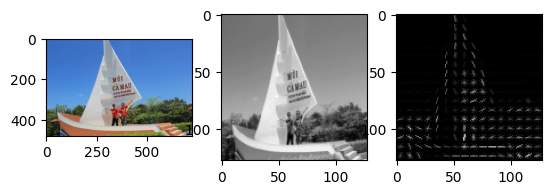

In [22]:
path = '/Users/mt/data/Landmark_Classification/test/mui_ca_mau/3eb28d16594b49ac.jpg'
img = io.imread(path)
n_chan = img.shape[2]

if n_chan == 4: #rgba
    img = color.rgba2rgb(img)

grayscale = color.rgb2gray(img)
grayscale = transform.resize(grayscale, (128, 128))

_, vis_hog = feature.hog(grayscale, visualize=True)

_, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(img)
axes[1].imshow(grayscale, cmap=plt.cm.gray)
axes[2].imshow(vis_hog, cmap=plt.cm.gray)

In [23]:
X_hog = img_to_hog(path)
X_hog = X_hog.reshape(1, -1)
X_scale = scaler.transform(X_hog)
# X_pca = pca.transform(X_scale)
# X = X_pca.reshape(1, -1)
X = X_scale

classes = ds_test.target_names
pred = model.predict(X)
pred, classes[pred[0]]

(array([9]), 'cot_co')